<a href="https://colab.research.google.com/github/TRAGIC11/Car_Price_Prediction_using_Lasso_Regression/blob/main/Car_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MOUNTING GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


 **DOWNLOADING DATA TO YOUR DRIVE**

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"
%cd /content/gdrive/My Drive/kaggle
!kaggle datasets download -d nehalbirla/vehicle-dataset-from-cardekho

/content/gdrive/My Drive/kaggle
vehicle-dataset-from-cardekho.zip: Skipping, found more recently modified local copy (use --force to force download)


**UNZIPPING DATA**

In [ ]:
!ls
!unzip \*.zip  && rm *.zip

'car data.csv'			   kaggle.json
'CAR DETAILS FROM CAR DEKHO.csv'   vehicle-dataset-from-cardekho.zip
'Car details v3.csv'
Archive:  vehicle-dataset-from-cardekho.zip
replace CAR DETAILS FROM CAR DEKHO.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CAR DETAILS FROM CAR DEKHO.csv  
replace Car details v3.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Car details v3.csv      
replace car data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: car data.csv            


**Importing the Dependencies**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics
from pandas.plotting import radviz
import tabulate

**DATA COLLECTION AND PROCESSING**

In [ ]:
#loading the data file from csv using Pandas Library
car_dataset = pd.read_csv('car data.csv')

In [ ]:
#inspecting data frame
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#number of data points (rows and colunmns)
car_dataset.shape

(301, 9)

In [ ]:
#get some information about our dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
#checking number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

No Null Data

In [ ]:
#Checking distribution of Categorical Data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


**Let's Convert String Data to Numerical Value**

> like Petrol = 0, Diesel = 1, CNG = 2



In [ ]:
car_dataset["Is_Petrol"] = car_dataset["Fuel_Type"] == "Petrol"
car_dataset["Is_Diesel"] = car_dataset["Fuel_Type"] == "Diesel"
car_dataset["Is_CNG"] = car_dataset["Fuel_Type"] == "CNG"

car_dataset["Is_Petrol"] = car_dataset["Is_Petrol"]*1
car_dataset["Is_Diesel"] = car_dataset["Is_Diesel"]*1
car_dataset["Is_CNG"] = car_dataset["Is_CNG"]*1

#car_dataset.replace({'Fuel_Type':{"Petrol":'0',"Diesel":'1',"CNG":'2'}}, inplace=True )
car_dataset.replace({'Seller_Type':{"Dealer":0,"Individual":1}}, inplace=True )
car_dataset.replace({'Transmission':{"Manual":0,"Automatic":1}}, inplace=True )

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Is_Petrol,Is_Diesel,Is_CNG
0,ritz,2014,3.35,5.59,27000,Petrol,0,0,0,1,0,0
1,sx4,2013,4.75,9.54,43000,Diesel,0,0,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,0,0,0,1,0,0
3,wagon r,2011,2.85,4.15,5200,Petrol,0,0,0,1,0,0
4,swift,2014,4.60,6.87,42450,Diesel,0,0,0,0,1,0


In [ ]:
car_dataset = car_dataset.drop(["Fuel_Type"],axis=1)
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Is_Petrol,Is_Diesel,Is_CNG
0,ritz,2014,3.35,5.59,27000,0,0,0,1,0,0
1,sx4,2013,4.75,9.54,43000,0,0,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,1,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,1,0,0
4,swift,2014,4.60,6.87,42450,0,0,0,0,1,0


**Spliting Data** into training data and test data

In [ ]:
X = car_dataset.drop(["Car_Name","Selling_Price"],axis = 1)
Y = car_dataset['Selling_Price']

In [ ]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Seller_Type  Transmission  Owner  \
0    2014           5.59       27000            0             0      0   
1    2013           9.54       43000            0             0      0   
2    2017           9.85        6900            0             0      0   
3    2011           4.15        5200            0             0      0   
4    2014           6.87       42450            0             0      0   
..    ...            ...         ...          ...           ...    ...   
296  2016          11.60       33988            0             0      0   
297  2015           5.90       60000            0             0      0   
298  2009          11.00       87934            0             0      0   
299  2017          12.50        9000            0             0      0   
300  2016           5.90        5464            0             0      0   

     Is_Petrol  Is_Diesel  Is_CNG  
0            1          0       0  
1            0          1       0  
2  

**Correlation Matrix**

In [ ]:
def plot_corr(df, size=11):
    """ 
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """
    
    
    corr = df.corr()  #data frame correlation function 
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)   # color code the rectangles by correlation values
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

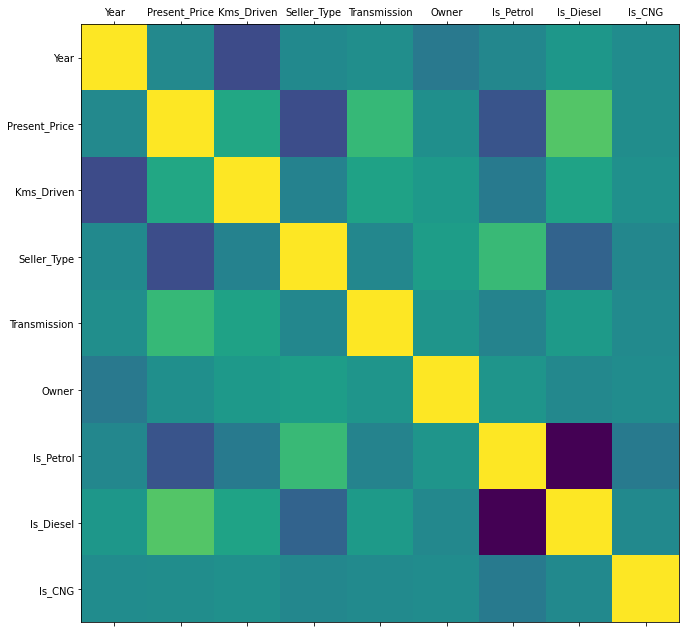

In [ ]:
plot_corr(X) 

In [ ]:
X.corr()

,Year,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Is_Petrol,Is_Diesel,Is_CNG
Year,1.000000,-0.047584,-0.524342,-0.039896,-0.000394,-0.182104,-0.059959,0.064315,-0.017790
Present_Price,-0.047584,1.000000,0.203647,-0.512030,0.348715,0.008057,-0.465244,0.473306,-0.011500
Kms_Driven,-0.524342,0.203647,1.000000,-0.101419,0.162510,0.089216,-0.172874,0.172515,0.012223
Seller_Type,-0.039896,-0.512030,-0.101419,1.000000,-0.063240,0.124269,0.358321,-0.350467,-0.060300
Transmission,-0.000394,0.348715,0.162510,-0.063240,1.000000,0.050316,-0.091013,0.098643,-0.032018
Owner,-0.182104,0.008057,0.089216,0.124269,0.050316,1.000000,0.055687,-0.053469,-0.014272
Is_Petrol,-0.059959,-0.465244,-0.172874,0.358321,-0.091013,0.055687,1.000000,-0.979648,-0.160577
Is_Diesel,0.064315,0.473306,0.172515,-0.350467,0.098643,-0.053469,-0.979648,1.000000,-0.040808
Is_CNG,-0.017790,-0.011500,0.012223,-0.060300,-0.032018,-0.014272,-0.160577,-0.040808,1.000000


**Splitting Training and Test Data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 9)

Model Training

# Linear Regression
Loading linear regression model

In [ ]:
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Training done, now test it

In [ ]:
#prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
#Error Metric as R-Square Error
r2_score = metrics.r2_score(training_data_prediction,Y_train)
print(f"R Squared Error: {r2_score}")

R Squared Error: 0.8795000347358122


In [ ]:
mae = metrics.mean_absolute_error(training_data_prediction,Y_train)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 1.1646842418571912


In [ ]:
rmse = metrics.mean_squared_error(training_data_prediction,Y_train,squared=False)
print(f"Mean Absolute Error: {rmse}")

Mean Absolute Error: 1.7385508642087388


Let's Visualise our Predictions

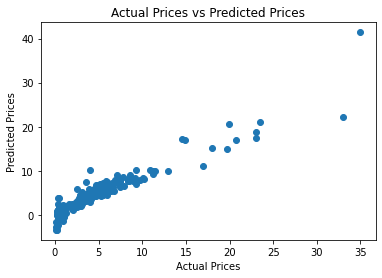

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

**Now let's test it on Test Data**

R Squared Error: 0.8406792679077706
Mean Absolute Error: 1.3093598246921438
Mean Absolute Error: 1.7813257852512787


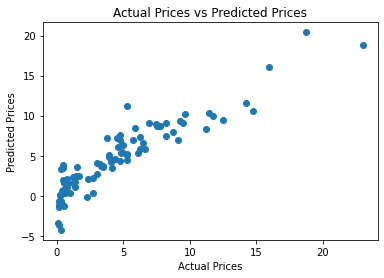

In [ ]:
test_data_prediction = lin_reg_model.predict(X_test)
error_score = metrics.r2_score(test_data_prediction,Y_test)
print(f"R Squared Error: {error_score}")
mae = metrics.mean_absolute_error(test_data_prediction,Y_test)
print(f"Mean Absolute Error: {mae}")
rmse = metrics.mean_squared_error(test_data_prediction,Y_test,squared=False)
print(f"Mean Absolute Error: {rmse}")
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

# Lasso Regression

In [ ]:
las_reg_model = Lasso()
las_reg_model.fit(X_train,Y_train)

Lasso()

In [ ]:
training_data_prediction = las_reg_model.predict(X_train)

In [ ]:
error_score = metrics.r2_score(training_data_prediction,Y_train)
print(f"R Squared Error: {error_score}")

R Squared Error: 0.8103104765416159


In [ ]:
mae = metrics.mean_absolute_error(training_data_prediction,Y_train)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 1.2209317346080746


In [ ]:
rmse = metrics.mean_squared_error(training_data_prediction,Y_train,squared=False)
print(f"Mean Absolute Error: {rmse}")

Mean Absolute Error: 2.0512838350075944


Let's Visualise

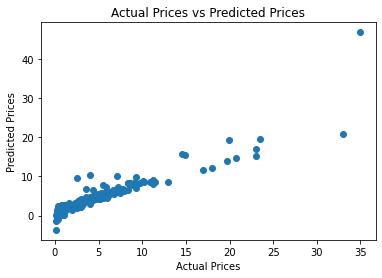

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Let's try it on Test Data

R Squared Error: 0.7669318245049099
Mean Absolute Error: 1.3515811207864046
Mean Absolute Error: 1.868419246092035


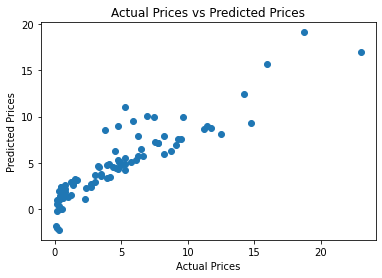

In [ ]:
test_data_prediction = las_reg_model.predict(X_test)
error_score = metrics.r2_score(test_data_prediction,Y_test)
print(f"R Squared Error: {error_score}")
mae = metrics.mean_absolute_error(test_data_prediction,Y_test)
print(f"Mean Absolute Error: {mae}")
rmse = metrics.mean_squared_error(test_data_prediction,Y_test,squared=False)
print(f"Mean Absolute Error: {rmse}")
plt.scatter(Y_test,test_data_prediction)

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

# Ridge Regression

In [ ]:
ridge_reg_model = Ridge()
ridge_reg_model.fit(X_train,Y_train)

Ridge()

In [ ]:
training_data_prediction = ridge_reg_model.predict(X_train)

In [ ]:
error_score = metrics.r2_score(training_data_prediction,Y_train)
print(f"R Squared Error: {error_score}")

R Squared Error: 0.8790272912620737


In [ ]:
mae = metrics.mean_absolute_error(training_data_prediction,Y_train)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 1.1624182640591665


In [ ]:
rmse = metrics.mean_squared_error(training_data_prediction,Y_train,squared=False)
print(f"Mean Absolute Error: {rmse}")

Mean Absolute Error: 1.7393073322979182


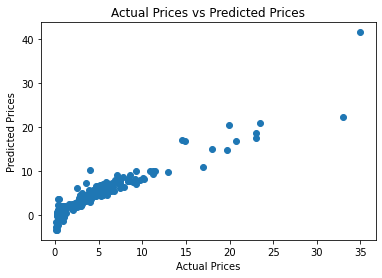

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

R Squared Error: 0.8409415679623538
Mean Absolute Error: 1.3040784873397573
Root Mean Squared Error: 1.774658923676101


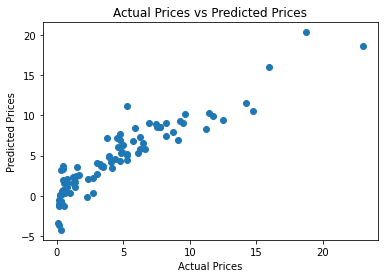

In [ ]:
test_data_prediction = ridge_reg_model.predict(X_test)
error_score = metrics.r2_score(test_data_prediction,Y_test)
print(f"R Squared Error: {error_score}")
mae = metrics.mean_absolute_error(test_data_prediction,Y_test)
print(f"Mean Absolute Error: {mae}")
rmse = metrics.mean_squared_error(test_data_prediction,Y_test,squared=False)
print(f"Root Mean Squared Error: {rmse}")
plt.scatter(Y_test,test_data_prediction)

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()